<div class="alert alert-block alert-info">
<center><strong>MÉTODOS NUMÉRICOS</strong></center>
<center>LISTA 02</center>
<center>ALUNO: <strong>JHONATAN GUILHERME OLIVEIRA PEREIRA</strong></center>
</div>

In [77]:
import matplotlib.pyplot as plt
import numpy as np

<strong>Questão 1.1</strong> - O método “divisão e média”, um método antigo para estimação de raiz
quadrada de um número positivo a. Calcule o erro relativo da aproximação para as 10 primeiras iterações.

In [78]:
numero = valorMedido = valorReal = 144
for i in range(10):
  valorReal = valorMedido
  valorMedido = (valorReal + numero / valorReal) / 2
  erro = np.abs(valorMedido - valorReal) / valorMedido
  print(erro)

0.9862068965517241
0.9466691356881627
0.8118936453452327
0.49161484021073765
0.1374527157458449
0.009536714292150085
4.547652776551634e-05
1.0340572842437723e-09
0.0
0.0


<strong>Questão 1.2</strong> - Para computadores, o épsilon da máquina, ε, pode ser definido como o menor número que, adicionado a um, retorna um número maior que um, como definimos anteriormente. Usando o algoritmo abaixo, implemente um programa que calcula o épsilon da sua máquina.

In [79]:
e = 1

while True:
  if 1 + e <= 1:
    e = 2 * e
    break
  e /= 2
  
print(e)

2.220446049250313e-16


<strong>Questão 1.3</strong> - Implemente essa série iterativa, verificando se a convergência de fato ocorre e justifique o resultado obtido.

In [80]:
x = 0
for i in range(1, 4):
  if i == 1:
    print(1 / 3)
  else:
    print(4 * (1 / 3) - 1)

0.3333333333333333
0.33333333333333326
0.33333333333333326


Há uma pequena divergência entre os valores obtidos pela divisão de _1 / 3_ e _4 * (1 / 3) - 1_, resultando em diferenças mínimas de algumas casas decimais resultado da operação adicional que há na segunda parte, onde é feita a multiplicação por 4, e após isso decrescendo um do resultado. Após isso, todos os próximos valores da série iterativa serão exatamente iguais ao segundo, já que são valores constantes na equação.

<strong>Questão 1.4</strong> - Qual dessas expressões é mais adequada quando µ é um número pequeno? Por quê?

In [81]:
def firstFunction(u):
      return np.exp(1 / u) / (1 + np.exp(1 / u))

def secondFunction(u):
      return 1 / (np.exp(-1 / u) + 1)

print(f"Primeira função: \n {firstFunction(0.1)} / {firstFunction(0.01)} / {firstFunction(0.001)} / {firstFunction(0.0001)}")

print(f"Segunda função: \n {secondFunction(0.1)} / {secondFunction(0.01)} / {secondFunction(0.001)} / {secondFunction(0.0001)}")

Primeira função: 
 0.9999546021312976 / 1.0 / nan / nan
Segunda função: 
 0.9999546021312976 / 1.0 / 1.0 / 1.0


C:\Users\John\AppData\Local\Temp/ipykernel_9060/4208570435.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(1 / u) / (1 + np.exp(1 / u))
C:\Users\John\AppData\Local\Temp/ipykernel_9060/4208570435.py:2: RuntimeWarning: invalid value encountered in double_scalars
  return np.exp(1 / u) / (1 + np.exp(1 / u))


A segunda função é a mais adequada pois suporta bem mais valores que a primeira. Observando os resultados da primeira função, foi identificado que a primeira gerou problemas de overflow após executar com o µ = 0,001.

<strong>Questão 1.5</strong> - Compare os resultados com o resultado analítico e explique-os.

In [93]:
def function(x):
  return ((1 + x) - 1) / x

arr = [function(10**-12), function(10**-15), function(10**-17)]
for i in arr:
  print(i)

1.000088900582341
1.1102230246251565
0.0


Através dos valores obtidos, é possível observar que a máquina não suporta tão bem os valores pequenos gerados por _10 ** -12_ em diante, o que acaba gerando algumas pequenas divergências do resultado esperado, que seria 1. Então, é entendido que o problema é que o ε da máquina não suporta tão bem os números submetidos, até que, a partir de _10 ** -17_, o resultado se dá como 0, pois, é gerado um problema de underflow, onde as casas decimais são tão baixas que o arredondamento não consegue ser feito corretamente pela máquina.

<strong>Questão 1.6</strong> - Existem diferentes métodos para calcular aproximadamente o valor de π
computacionalmente. Vários desses métodos usam a aproximação por séries de Taylor para
o arcotangente...

In [82]:
def arctan(x, n):
  res = 0
  for i in range(n + 1):
    res += (-1)**i * ((x**(2 * i + 1)) / (2 * i + 1))
  return res

In [86]:
def calcularErroRelativo(arr):
  erroRelativo = np.array([])
  valorMedido = valorReal = 0
  for i in arr:
    valorMedido = valorReal
    valorReal = i
    erroRelativo = np.append(erroRelativo, np.abs(valorReal - valorMedido) / valorReal)
  return erroRelativo

a) Fórmula de Machin

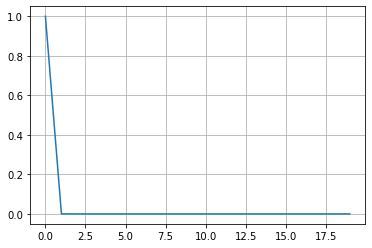

In [87]:
machinFormula = np.array([])
for i in range(1, 21):
  machinFormula = np.append(machinFormula, 4 * (4 * arctan(1 / 5, i) - arctan(1 / 239, i)))

erroRelativoMachinFormula = calcularErroRelativo(machinFormula)

plt.plot(erroRelativoMachinFormula)
plt.grid(True)

b) Fórmula de Hutton

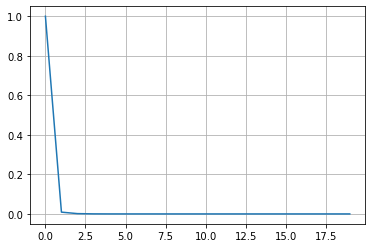

In [88]:
huttonFormula = np.array([])
for i in range(1, 21):
  huttonFormula = np.append(huttonFormula, 4 * (arctan(1 / 2, i) + arctan(1 / 3, i)))

erroRelativoHuttonFormula = calcularErroRelativo(huttonFormula)

plt.plot(erroRelativoHuttonFormula)
plt.grid(True)

c) Fórmula de Clausen

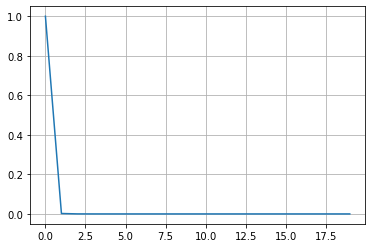

In [89]:
clausenFormula = np.array([])
for i in range(1, 21):
  clausenFormula = np.append(clausenFormula, 4 * (2 * arctan(1 / 3, i) + arctan(1 / 7, i)))

erroRelativoClausenFormula = calcularErroRelativo(clausenFormula)

plt.plot(erroRelativoClausenFormula)
plt.grid(True)

d) Fórmula de Dase

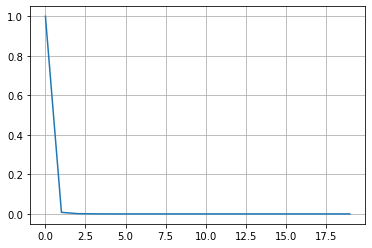

In [90]:
clausenFormula = np.array([])
for i in range(1, 21):
  clausenFormula = np.append(clausenFormula, 4 * (arctan(1 / 2, i) + arctan(1 / 5, i) + arctan(1 / 8, i)))

erroRelativoDaseFormula = calcularErroRelativo(clausenFormula)

plt.plot(erroRelativoDaseFormula)
plt.grid(True)

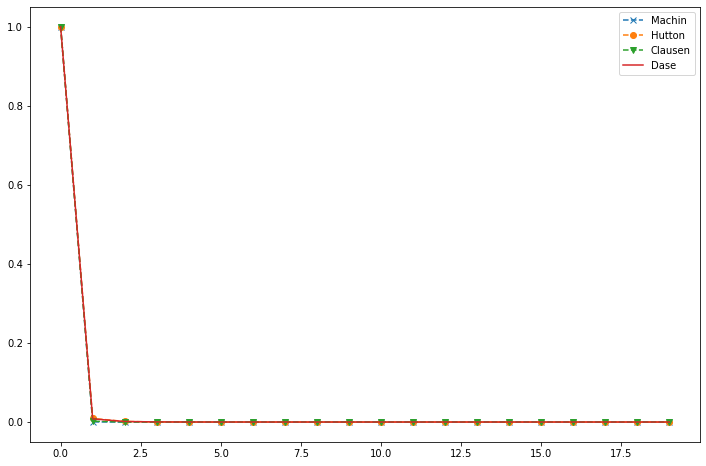

In [92]:
plt.figure(figsize=(12, 8))
plt.plot(erroRelativoMachinFormula, 'x--')
plt.plot(erroRelativoHuttonFormula, 'o--')
plt.plot(erroRelativoClausenFormula, 'v--')
plt.plot(erroRelativoDaseFormula)
plt.legend(['Machin', 'Hutton', 'Clausen', 'Dase'])

Os resultados dos cálculos de erros relativos são extremamente próximos, mas é possível notar que utilizando a fórmula de Machin, o erro relativo tende a zero mais rapidamente.